# Introduction

This project focuses on the **classification of stars** using data from the **Gaia DR3 catalog**, filtered to include stellar properties apparent magnitudes of photometric bands. The goal is to classify stars into their respective spectral types (O, B, A, F, G, K, M) based on these features.

## Project Overview:
We aim to develop a machine learning model capable of accurately classifying stars using their physical characteristics. The dataset includes stars of all spectral types with various features that will be leveraged to train a model and evaluate its performance on unseen data.

## Model Architecture:
For this task, we use a **Artificial Neural Network (ANN)** to handle the classification of stars into spectral types. The ANN is designed to:
- Extract complex patterns from the numerical data (e.g., temperature, luminosity).
- Handle imbalanced classes through techniques such as **SMOTE** to balance the training set.
- Provide robust performance across all spectral classes.

## Task Breakdown:
1. **Data Preprocessing**:
   - Handle missing data by dropping rows or columns and imputing missing values where necessary.
   - Normalize numerical features (e.g. the apparent magnitudes) to ensure uniform scale for model training.
   - Encode the target labels (spectral types) as numerical values.

2. **Balancing the Data**:
   - Use **SMOTE** (Synthetic Minority Over-sampling Technique) to handle class imbalance, ensuring that each spectral type is represented equally in the training data.

3. **Model Training**:
   - Build and train the Artificial Neural Network (ANN) using the preprocessed data.
   - Evaluate the model’s performance using the test set to ensure it generalizes well to unseen data.

4. **Evaluation and Results**:
   - Assess the model’s accuracy, precision, recall, and F1 score to determine its effectiveness in classifying stars into their respective spectral types.
   - Visualize the results using confusion matrices and other metrics.



# Data Preprocessing

In this section, we preprocess the raw dataset to prepare it for training our machine learning model. The preprocessing steps ensure that the data is clean, properly formatted, and suitable for model input. Below are the high-level steps that were carried out:

## 1. Handling Missing Values:
   - **Critical Features**: We dropped rows with missing values in critical features such as `Teff` (Effective Temperature), `Lum-Flame` (Luminosity), and `SpType-ELS` (Spectral Class), as these are essential for classification.
   - **Non-Critical Features**: Columns with a large number of missing values, such as `GRVSmag` and `RV`, were dropped since they were not critical to the star classification task.

## 2. Feature Selection:
   - We selected the most relevant features for classification:
     - **Gmag**: This is the average apparent magnitude in the G band, the central band of Gaia’s photometric system, capturing light in the green part of the spectrum. It provides a baseline measure of the star’s brightness in a mid-range wavelength.
     - **BPmag**: The average apparent magnitude in the Blue Photometer (BP) band, representing the star’s brightness in shorter (bluer) wavelengths. It’s useful for assessing the star’s output at the blue end of the spectrum.
     - **RPmag**: The average apparent magnitude in the Red Photometer (RP) band, capturing brightness in longer (redder) wavelengths. This complements BPmag by providing data on the star’s red light emissions.
     - **Luminosity**:
   - These features were chosen because they provide important information about the photometric characteristics of the stars from which we can infer the classification of each star. It is also important to note that all these values are directly observed values and not inferred ones like temperature or luminosity meaning that the user of the ANN need only input these values to get a classification as output, which is what we desire to have.

## 3. Normalization:
   - To ensure consistent scale across all features, we applied **Min-Max Scaling** to the numerical columns. This scaled all features between 0 and 1, which helps improve the performance of machine learning models.

## 4. Label Encoding:
   - The target variable, `SpType-ELS` (Spectral Class), contains categorical labels representing different spectral types (O, B, A, F, G, K, M). We converted these labels into numerical values using **Label Encoding**. We then took these label encodings and transformed them into **one-hot** truth labels.

## 5. Train-Test Split:
   - We split the dataset into a training set and a test set. The training set is used to train the model, while the test set is reserved for evaluating the model's performance on unseen data.
   - We used an 80-20 split, meaning 80% of the data was used for training, and 20% was used for testing.

## 6. Handling Class Imbalance:
   - Since the dataset contains an imbalance across spectral classes (with some classes having far fewer samples), we applied **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the training set. SMOTE generates synthetic samples for the minority classes, ensuring that the model receives an equal representation of all classes.

These preprocessing steps ensure that the dataset is clean, balanced, and ready for use in our machine learning model.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Handle Missing Data

#### Drop rows with missing critical data (Teff, Lum-Flame, SpType-ELS)
- The features 'Teff' (Temperature), 'Lum-Flame' (Luminosity), and 'SpType-ELS' (Spectral class) are essential for the classification task.
- Without these values, the data is incomplete for predicting the star's spectral class.
- Dropping rows with missing values ensures that only complete and useful data points are retained for analysis.

#### Drop entire columns with too many missing values (GRVSmag, RV)
- 'GRVSmag' and 'RV' have a significant amount of missing data, which means they are unavailable for many stars.
- Retaining these columns could lead to complications, such as model inefficiency or biased results due to incomplete data.
- These columns are not critical to the primary classification task (spectral classification), so it's better to drop them entirely to maintain dataset consistency.


In [2]:
import pandas as pd

# Download latest version
#!kaggle datasets download -d realkiller69/gaia-stars-dataset-from-dr3-data-release-3
#import zipfile

# Unzip the file after downloading
#with zipfile.ZipFile('gaia-stars-dataset-from-dr3-data-release-3.zip', 'r') as zip_ref:
#    zip_ref.extractall("path/to/extract")
#df = pd.read_csv("path/to/extract/dataGaia2.csv")

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/APS360/datasets/dataGaia2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
print("Original dataset shape:", df.shape)  # Before cleaning

# Get a summary of the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Document the number of rows before dropping
rows_before_cleaning = df.shape[0]

# Drop rows with missing critical data (SpType-ELS)
#df_cleaned = df.dropna(subset=['Teff', 'Lum-Flame', 'SpType-ELS', 'Gmag', 'BPmag', 'RPmag'])
df_cleaned = df.dropna(subset=['SpType-ELS', 'Gmag', 'BPmag', 'RPmag', 'Lum-Flame'])

# Document the number of rows after dropping
rows_after_cleaning = df_cleaned.shape[0]
rows_dropped = rows_before_cleaning - rows_after_cleaning

print(f"Rows dropped during cleaning: {rows_dropped}")
print("Cleaned dataset shape:", df_cleaned.shape)  # After cleaning

# Drop entire columns with too many missing values (GRVSmag, RV)
df_cleaned = df_cleaned.drop(columns=['GRVSmag', 'RV'])

# Check the available columns in the cleaned dataset
print("Available columns after cleaning:", df_cleaned.columns)


Original dataset shape: (626016, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag  

### Step 2: Select key features for classification
- We choose features that are directly related to star classification based on spectral type:
   - 'Gmag' (G-band Magnitude)
   - 'BPmag' (BP-band Magnitude)
   - 'RPmag' (RP-band Magnitude)
   - 'Lum-Flame' (Luminosity relative to the sun)
   
- These features represent physical properties of stars and will be used as inputs for the model.
- 'SpType-ELS' (Spectral Class) is our target variable, which the model will predict.


In [3]:
# Create new columns for the color indices

# Select key features for classification
features = ['Gmag', 'BPmag', 'RPmag', 'Lum-Flame']
target = 'SpType-ELS'

# Separate the selected features (X) and the target variable (y)
X = df_cleaned[features]
y = df_cleaned[target]

### Step 3: Normalize numerical features to scale them between 0 and 1
- Neural networks, perform better when input features are on a similar scale.
- Normalizing the data helps the model converge faster and prevents any feature from dominating the learning process due to a larger numerical range.
- We use **MinMaxScaler** to transform the values, scaling all numerical features to fall between 0 and 1.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Since the features in X are scaled together
# this is used later for plotting
lum_flame_index = features.index('Lum-Flame')
original_min_lumFlame = scaler.data_min_[lum_flame_index]
original_max_lumFlame = scaler.data_max_[lum_flame_index]
print(f"Original range of Lum-Flame: [{original_min_lumFlame}, {original_max_lumFlame}]")

Original range of Lum-Flame: [0.0347323, 3499.921]


### Step 4: Encode the target labels (SpType-ELS) as numerical values
- The 'SpType-ELS' column contains categorical data representing spectral types (O, B, A, F, G, K, M).
- Machine learning models require numerical input, so we use **LabelEncoder** to convert these categorical labels into integer form.
- For example:
   - O -> 0
   - B -> 1
   - A -> 2
   - And so on for the remaining classes.
- Then convert these into **one-hot** encodings.


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_oneHot = pd.get_dummies(y_encoded, dtype=int)

### Step 5: Handle class imbalance
- Some spectral classes (like O-type stars) may be underrepresented in the dataset, leading to class imbalance.
- Class imbalance can negatively impact model performance, as the model may become biased toward the majority class.
- **SMOTE** (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority classes, balancing the dataset.
- This allows the model to learn from all classes more effectively, improving performance for underrepresented classes.
- We use `np.unique()` to count the number of occurrences for each class in the balanced dataset.


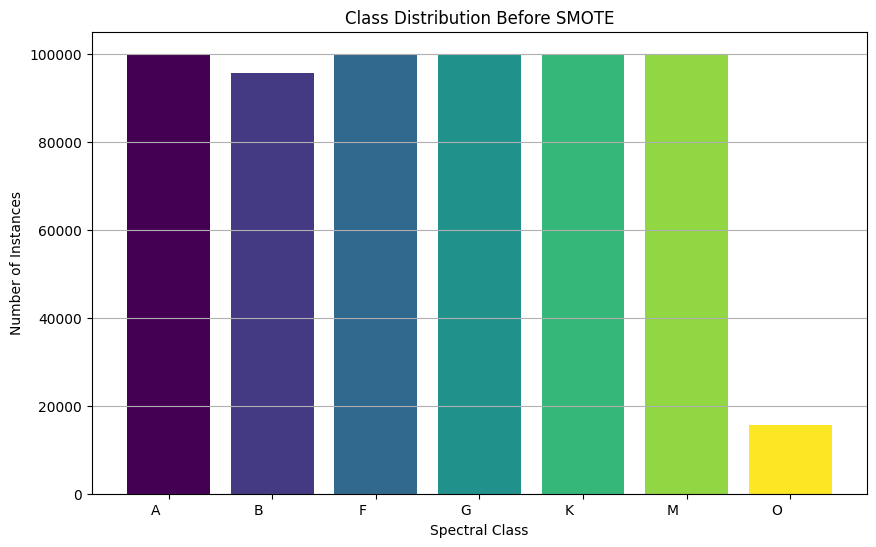

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


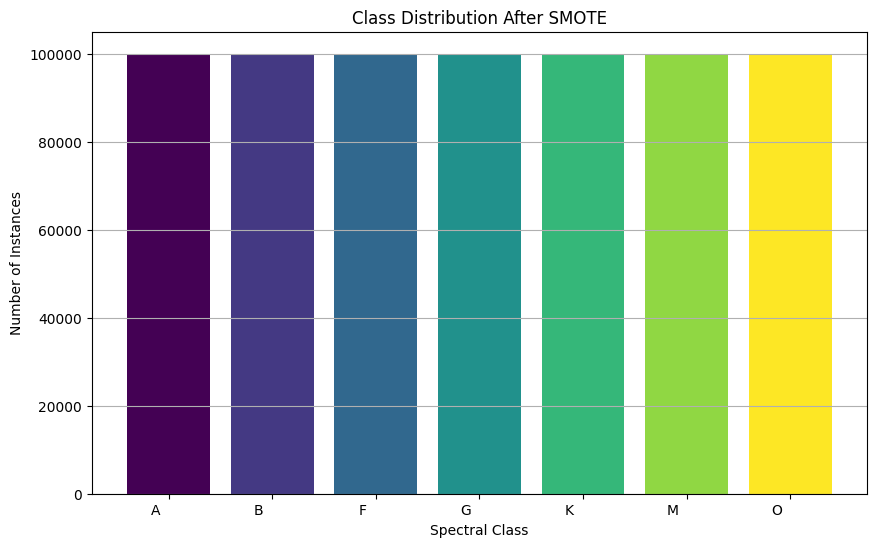

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Combine features and target into a DataFrame for normalization
data = pd.DataFrame(X_scaled)
data['target'] = y_encoded

# Remove rows with any missing values
data.dropna(inplace=True)

# Get the unique classes and their counts
unique, counts = np.unique(data['target'], return_counts=True)
unique = label_encoder.inverse_transform(unique)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using the viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(unique)))  # Generate colors from the viridis colormap
plt.bar(unique, counts, color=colors)

# Add labels and title
plt.xlabel('Spectral Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before SMOTE')
plt.xticks(unique)  # Show all classes on x-axis
plt.grid(axis='y')

# Show the plot
plt.show()

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(data.drop('target', axis=1), data['target'])

# Combine the balanced features and target back into a DataFrame
balanced_data = pd.DataFrame(X_balanced, columns=data.columns[:-1])
balanced_data['target'] = y_balanced

# Get the unique classes and their counts
unique, counts = np.unique(y_balanced, return_counts=True)
unique = label_encoder.inverse_transform(unique)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using the viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(unique)))  # Generate colors from the viridis colormap
plt.bar(unique, counts, color=colors)

# Add labels and title
plt.xlabel('Spectral Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution After SMOTE')
plt.xticks(unique)  # Show all classes on x-axis
plt.grid(axis='y')

# Show the plot
plt.show()

### Step 6: Split the dataset into training and testing sets
- To evaluate model performance, we split the data into **training** and **testing** sets.
- The model will learn on the **training set** and be evaluated on the **test set**.
- This ensures that the model is assessed on unseen data, preventing overfitting.
- We use an 70-15-15 split, meaning 70% of the data is used for training, 15% for validation, and 15% for testing


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data_split(y_train, y_val, y_test):
    # Get the class distributions
    train_counts = np.unique(y_train, return_counts=True)
    val_counts = np.unique(y_val, return_counts=True)
    test_counts = np.unique(y_test, return_counts=True)

    # Set bar width
    bar_width = 0.25

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Set positions for each set's bars
    positions_train = np.arange(len(train_counts[0]))  # Positions for training set
    positions_val = positions_train + bar_width         # Positions for validation set
    positions_test = positions_train + 2 * bar_width    # Positions for test set

    # Create bars for each set
    plt.bar(positions_train, train_counts[1], width=bar_width, label='Training Set', color='blue')
    plt.bar(positions_val, val_counts[1], width=bar_width, label='Validation Set', color='orange')
    plt.bar(positions_test, test_counts[1], width=bar_width, label='Test Set', color='green')

    # Add labels and title
    plt.xlabel('Spectral Class')
    plt.ylabel('Number of Instances')
    plt.title('Class Distribution in Training, Validation, and Test Sets')
    plt.xticks(positions_train + bar_width, label_encoder.inverse_transform(train_counts[0]))  # Set x-ticks to the spectral classes
    plt.legend()
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_data_split(y_train, y_val, y_test)


In [9]:
# Create the Stratified Shuffle Split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Split the balanced data into training (70%) and temporary set (30%)
for train_index, temp_index in sss.split(balanced_data, balanced_data['target']):
    train_set = balanced_data.loc[train_index].reset_index(drop=True)
    temp_set = balanced_data.loc[temp_index].reset_index(drop=True)

# Now split the temporary set (30%) directly into validation (15%) and testing (15%)
sss_temp = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for val_index, test_index in sss_temp.split(temp_set, temp_set['target']):
    val_set = temp_set.loc[val_index].reset_index(drop=True)
    test_set = temp_set.loc[test_index].reset_index(drop=True)

# Extract features and target for each set
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']
y_train_OH = pd.get_dummies(y_train, dtype=int)
X_val = val_set.drop('target', axis=1)
y_val = val_set['target']
y_val_OH = pd.get_dummies(y_val, dtype=int)
X_test = test_set.drop('target', axis=1)
y_test = test_set['target']
y_test_OH = pd.get_dummies(y_test, dtype=int)

# Check the sizes of the splits
print(f"Training set size: {len(y_train)}")
print(f"Validation set size: {len(y_val)}")
print(f"Test set size: {len(y_test)}")

Training set size: 490000
Validation set size: 105000
Test set size: 105000


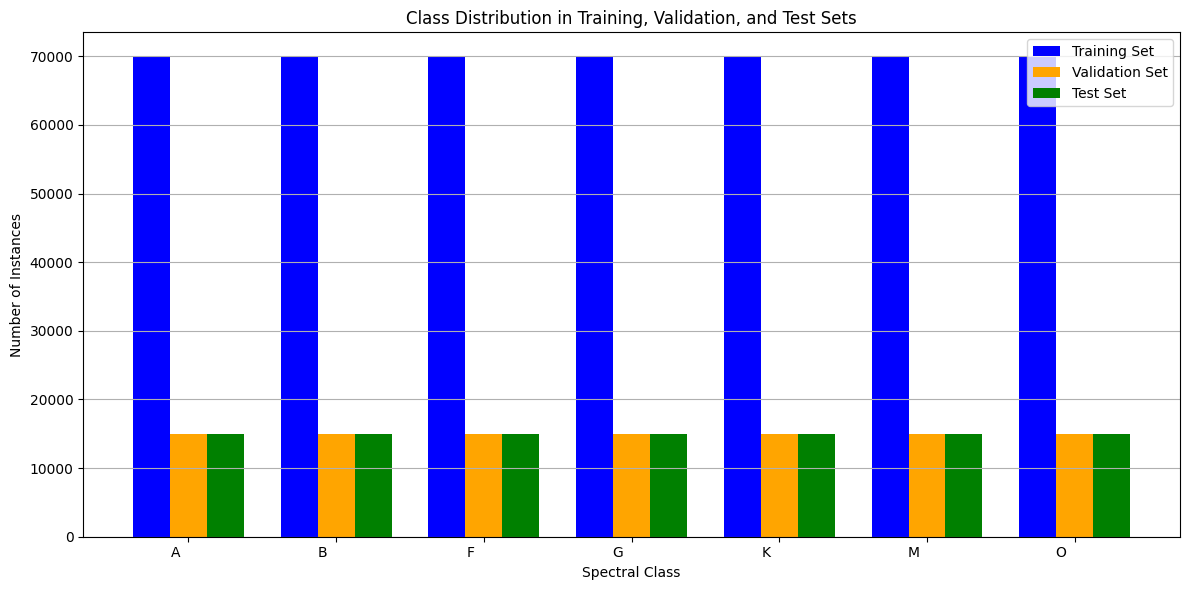

In [10]:
visualize_data_split(y_train, y_val, y_test)

### Step 7: Developping a baseline model
- Develop a quick baseline models to assess feasibility of the primary model
- The model will be a small **SVM** to attempt stellar classification.

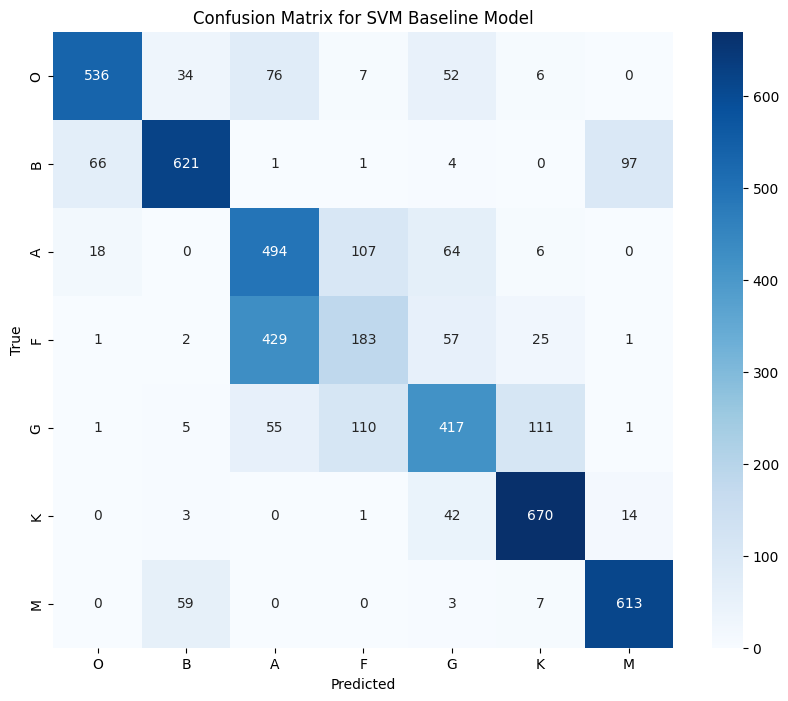

              precision    recall  f1-score   support

           O       0.86      0.75      0.80       711
           B       0.86      0.79      0.82       790
           A       0.47      0.72      0.57       689
           F       0.45      0.26      0.33       698
           G       0.65      0.60      0.62       700
           K       0.81      0.92      0.86       730
           M       0.84      0.90      0.87       682

    accuracy                           0.71      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.71      0.71      0.70      5000

The accuracy of the SVM is 0.7068, which is much higher than random chance as there are 7 different possible categories.


In [11]:
#baseline model - SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler  # For feature scaling
import seaborn as sns
import matplotlib.pyplot as plt

def test_SVM(X_train, y_train, X_test, y_test):
    # Create an SVM classifier object
    svm_classifier = SVC(kernel='linear', C=1)

    # Sample training and test data to speed up SVM training as we just need a proof of concept
    sample_X_train = X_train.sample(n=25000, random_state=42)
    sample_y_train = y_train[sample_X_train.index]
    sample_X_test = X_test.sample(n=5000, random_state=42)
    sample_y_test = y_test[sample_X_test.index]

    scaler = StandardScaler()
    sample_X_train = scaler.fit_transform(sample_X_train)
    sample_X_test = scaler.transform(sample_X_test)

    # Train the classifier
    svm_classifier.fit(sample_X_train, sample_y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(sample_X_test)

    # Calculate accuracy
    accuracy = accuracy_score(sample_y_test, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(sample_y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["O", "B", "A", "F", "G", "K", "M"], yticklabels=["O", "B", "A", "F", "G", "K", "M"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix for SVM Baseline Model")
    plt.show()

    # Print the classification report with descriptive class names
    class_names = ["O", "B", "A", "F", "G", "K", "M"]
    report = classification_report(sample_y_test, y_pred, target_names=class_names)
    print(report)

    return accuracy

# Run the function and print the overall accuracy
print(f"The accuracy of the SVM is {test_SVM(X_train, y_train, X_test, y_test):.4f}, which is much higher than random chance as there are 7 different possible categories.")


### Step 8: Developping a primary model
- We will be making a simple ANN with 6 inputs, 32 neuron hidden layer, then a 64 neuron hidden layer, then a 32 neuron hidden layer which is connected to out output layer of 7 for each of the stellar classifications

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

class StarClassifierANN(nn.Module):
    def __init__(self, activation_function = nn.ReLU()):
        super(StarClassifierANN, self).__init__()
        self.name = "StarClassifierANN"
        self.activation_function = activation_function
        # Define the network layers
        self.fc1 = nn.Linear(4, 64)  # 4 inputs for the photometric features
        self.fc2 = nn.Linear(64, 128) # Hidden layer with 64 neurons
        self.fc3 = nn.Linear(128, 150) # Another hidden layer with 32 neurons
        self.fc4 = nn.Linear(150, 75) # Another hidden layer with 32 neurons
        self.fc5 = nn.Linear(75, 7)  # 7 output classes for the spectral types

    def forward(self, x):
        # Define the forward pass
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.activation_function(self.fc4(x))
        x = self.fc5(x)  # Output layer without activation (logits)
        return x


In [13]:

def get_model_name(name, batch_size, learn_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learn_rate, epoch)
    return path

def plot_training_curve(epochs, train_loss, val_loss, train_err, val_err):
    """ Plots the training curve for a model run, given the training and validation data.

    Args:
        epochs: An array of epoch numbers.
        train_loss: An array of training losses.
        val_loss: An array of validation losses.
        train_err: An array of training errors.
        val_err: An array of validation errors.
    """
    import matplotlib.pyplot as plt
    plt.title("Train vs Validation Error")
    plt.plot(epochs, train_err, label="Train")
    plt.plot(epochs, val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(epochs, train_loss, label="Train")
    plt.plot(epochs, val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


In [14]:

def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    y_true = []
    y_pred = []

    net.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient computation for evaluation
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

            outputs = net(inputs)
            loss = criterion(outputs, labels.long())
            _, predicted = torch.max(outputs.data, 1)
            corr = predicted != labels
            total_err += int(corr.sum())
            total_loss += loss.item()
            total_epoch += len(labels)

            # Collect predictions and true labels
            y_true.extend(labels.cpu().numpy())  # Move back to CPU for analysis
            y_pred.extend(predicted.cpu().numpy())

    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss, y_true, y_pred

def trainModel(model, X_train, Y_train, X_val, Y_val, batch_size=25, num_epochs=1, learn_rate=0.001, momentum=0.6, step_size=10, gamma=0.1):
    torch.manual_seed(1000)

    # Move the model to GPU
    model = model.to(device)
    weights = torch.tensor([0.75, 0.85, 1.8, 1.85, 1.25, 0.95, 0.95])
    criterion = nn.CrossEntropyLoss(weight=weights).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    # Convert data to tensors and move them to GPU
    X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(np.argmax(Y_train, axis=1), dtype=torch.long).to(device)

    X_val_tensor = torch.tensor(X_val.to_numpy(), dtype=torch.float32).to(device)
    Y_val_tensor = torch.tensor(np.argmax(Y_val, axis=1), dtype=torch.long).to(device)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    print("Training Started...")
    final_y_true = []
    final_y_pred = []

    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        model.train()

        for i, data in enumerate(train_loader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            corr = predicted != labels

            total_train_err += int(corr.sum())
            total_epoch += len(labels)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)

        # Evaluate on validation set
        val_err[epoch], val_loss[epoch], y_true, y_pred = evaluate(model, val_loader, criterion)

        # Store the final predictions for the confusion matrix
        if epoch == num_epochs - 1:
            final_y_true = y_true
            final_y_pred = y_pred

        # Step the scheduler
        scheduler.step()

        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")
        print(f"Learning Rate: {scheduler.get_last_lr()[0]:.6f}")

    print('Finished Training')
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model.name), train_err)
    np.savetxt("{}_train_loss.csv".format(model.name), train_loss)
    np.savetxt("{}_val_err.csv".format(model.name), val_err)
    np.savetxt("{}_val_loss.csv".format(model.name), val_loss)

    plot_training_curve(epochs, train_loss, val_loss, train_err, val_err)

    # Generate the confusion matrix and classification report at the end of training
    cm = confusion_matrix(final_y_true, final_y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["O", "B", "A", "F", "G", "K", "M"], yticklabels=["O", "B", "A", "F", "G", "K", "M"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix for Primary Model")
    plt.show()

    class_names = ["O", "B", "A", "F", "G", "K", "M"]
    report = classification_report(final_y_true, final_y_pred, target_names=class_names)
    print("Classification Report:")
    print(report)



Using device: cuda
Training Started...
Epoch 1: Train err: 0.3826, Train loss: 0.9690 | Validation err: 0.2497, Validation loss: 0.6877
Learning Rate: 0.010000
Epoch 2: Train err: 0.2572, Train loss: 0.6801 | Validation err: 0.3043, Validation loss: 0.7425
Learning Rate: 0.010000
Epoch 3: Train err: 0.2465, Train loss: 0.6541 | Validation err: 0.2515, Validation loss: 0.6437
Learning Rate: 0.010000
Epoch 4: Train err: 0.2303, Train loss: 0.6142 | Validation err: 0.2142, Validation loss: 0.5785
Learning Rate: 0.010000
Epoch 5: Train err: 0.2231, Train loss: 0.5997 | Validation err: 0.2144, Validation loss: 0.5796
Learning Rate: 0.010000
Epoch 6: Train err: 0.2229, Train loss: 0.5994 | Validation err: 0.2251, Validation loss: 0.5934
Learning Rate: 0.010000
Epoch 7: Train err: 0.2182, Train loss: 0.5887 | Validation err: 0.2095, Validation loss: 0.5750
Learning Rate: 0.010000
Epoch 8: Train err: 0.2201, Train loss: 0.5933 | Validation err: 0.2189, Validation loss: 0.5881
Learning Rate: 0.

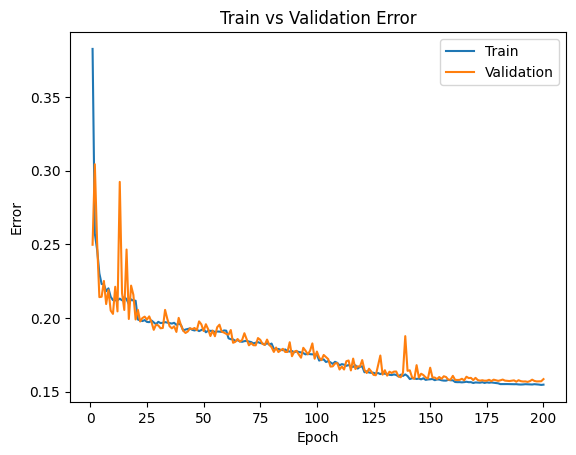

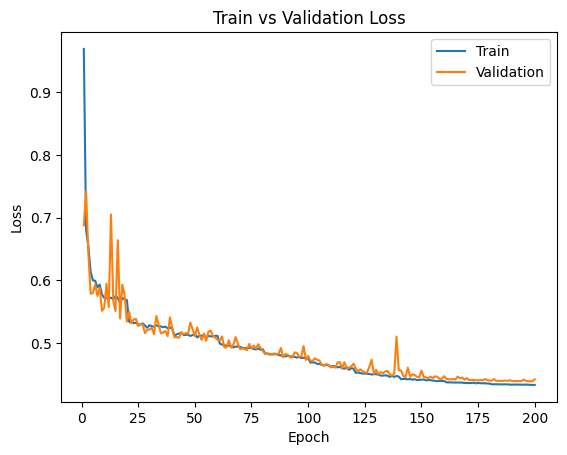

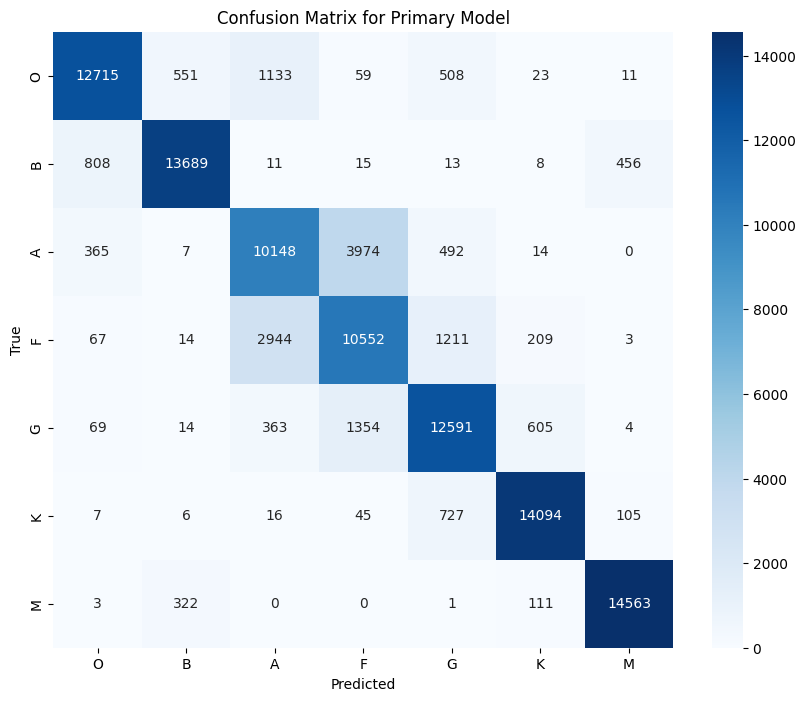

Classification Report:
              precision    recall  f1-score   support

           O       0.91      0.85      0.88     15000
           B       0.94      0.91      0.92     15000
           A       0.69      0.68      0.69     15000
           F       0.66      0.70      0.68     15000
           G       0.81      0.84      0.82     15000
           K       0.94      0.94      0.94     15000
           M       0.96      0.97      0.97     15000

    accuracy                           0.84    105000
   macro avg       0.84      0.84      0.84    105000
weighted avg       0.84      0.84      0.84    105000



In [15]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1000, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = StarClassifierANN(activation_function=nn.LeakyReLU(negative_slope=0.01))
model = model.to(device)

trainModel(model, X_train, y_train_OH, X_val, y_val_OH, batch_size=1000, num_epochs=200, learn_rate=0.01, step_size=20, gamma=0.5)

## Visualizing the model

Below are the temperature classifications for each spectral type
- O : > 30,000
- B : 10,000 ~ 28,000
- A : 7,500 ~ 10,000
- F : 6,000 ~ 7,500
- G : 5,000 ~ 6,000
- K : 3,500 ~ 5,000
- M : 2,500 ~ 3,500

In [16]:
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(np.argmax(y_test_OH, axis=1), dtype=torch.long).to(device)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

error, loss, y1, y2 = evaluate(model, test_loader, nn.CrossEntropyLoss())

print(f"Test Accuracy: {1 - error:.4f}")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 0.8399
Test Loss: 0.3811


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Mapping spectral classes to temperature ranges
spectral_class_to_temp = {
    0: (30000, 40000),  # O
    1: (10000, 30000),  # B
    2: (7500, 10000),   # A
    3: (6000, 7500),    # F
    4: (5000, 6000),    # G
    5: (3500, 5000),    # K
    6: (2500, 3500)     # M
}

def get_temperature(spectral_class):
    """
    Generate a normally distributed temperature value for a given spectral class.

    Args:
        spectral_class (int): The spectral class index (0 for O, 1 for B, ..., 6 for M).

    Returns:
        float: A temperature value for the given spectral class.
    """
    temp_range = spectral_class_to_temp[spectral_class]
    mean_temp = (temp_range[0] + temp_range[1]) / 2
    std_dev = (temp_range[1] - mean_temp) / 1.3  # Adjusted for a tighter spread
    return np.random.normal(mean_temp, std_dev)

def scale_temperature(temperature):
    """
    Scale temperature values such that each range occupies 1/7th of the x-axis.

    Args:
        temperature (float): The original temperature value.

    Returns:
        float: The scaled temperature value.
    """
    for i, (low, high) in enumerate(spectral_class_to_temp.values()):
        if low <= temperature <= high:
            # Map the temperature linearly to [i, i+1] range
            return i + (temperature - low) / (high - low)
    return None  # Shouldn't happen

def rescale_luminosities(scaled_luminosities, original_min, original_max):
    """
    Rescale luminosities from min-max scaled values back to original values.

    Args:
        scaled_luminosities (array-like): Scaled luminosities (between 0 and 1).
        original_min (float): Original minimum luminosity.
        original_max (float): Original maximum luminosity.

    Returns:
        array-like: Rescaled luminosities in their original range.
    """
    return scaled_luminosities * (original_max - original_min) + original_min

def plot_hr_diagram(model, loader, original_min_lumFlame, original_max_lumFlame):
    """
    Plot the Hertzsprung-Russell diagram based on model predictions and data.

    Args:
        model: The trained PyTorch model.
        loader: DataLoader with the input data.
        original_min_lumFlame: Original minimum luminosity before scaling.
        original_max_lumFlame: Original maximum luminosity before scaling.
    """
    # Step 1: Get luminosities and spectral type predictions
    model.eval()
    scaled_luminosities = []
    spectral_classes = []

    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get predicted spectral class
            scaled_luminosities.extend(inputs[:, 3].cpu().numpy())  # Assuming luminosity is the 4th input feature
            spectral_classes.extend(preds.cpu().numpy())

    # Step 2: Rescale luminosities to original values
    original_luminosities = rescale_luminosities(
        np.array(scaled_luminosities), original_min_lumFlame, original_max_lumFlame
    )

    # Step 3: Convert spectral classes to temperatures
    temperatures = [get_temperature(cls) for cls in spectral_classes]

    # Step 4: Randomly sample 1/8th of the data points
    total_points = len(temperatures)
    sample_indices = random.sample(range(total_points), total_points // 10)
    temperatures = np.array(temperatures)[sample_indices]
    original_luminosities = np.array(original_luminosities)[sample_indices]
    spectral_classes = np.array(spectral_classes)[sample_indices]

    # Step 5: Scale temperatures to occupy equal space on x-axis
    scaled_temperatures = [scale_temperature(temp) for temp in temperatures]

    # Step 6: Plot the HR diagram
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        scaled_temperatures, original_luminosities,
        c=spectral_classes, cmap='coolwarm', edgecolor='k', s=10  # Red-to-blue colormap
    )
    plt.colorbar(scatter, label='Spectral Class (0=O, 6=M)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.xlabel('Temperature (K)')
    plt.ylabel('Luminosity (L/L$_\odot$)')
    plt.title('Hertzsprung-Russell Diagram')

    # Custom ticks for temperature ranges
    plt.xticks(
        np.arange(7),  # One tick per spectral class
        ["40,000", "30,000", "10,000", "7,500",
         "6,000", "5,000", "3,500"],
        rotation=45
    )
    plt.yticks([1e-2, 1, 1e2, 1e4], ["$10^{-2}$", "1", "$10^{2}$", "$10^{4}$"])  # Exponential scale
    plt.show()

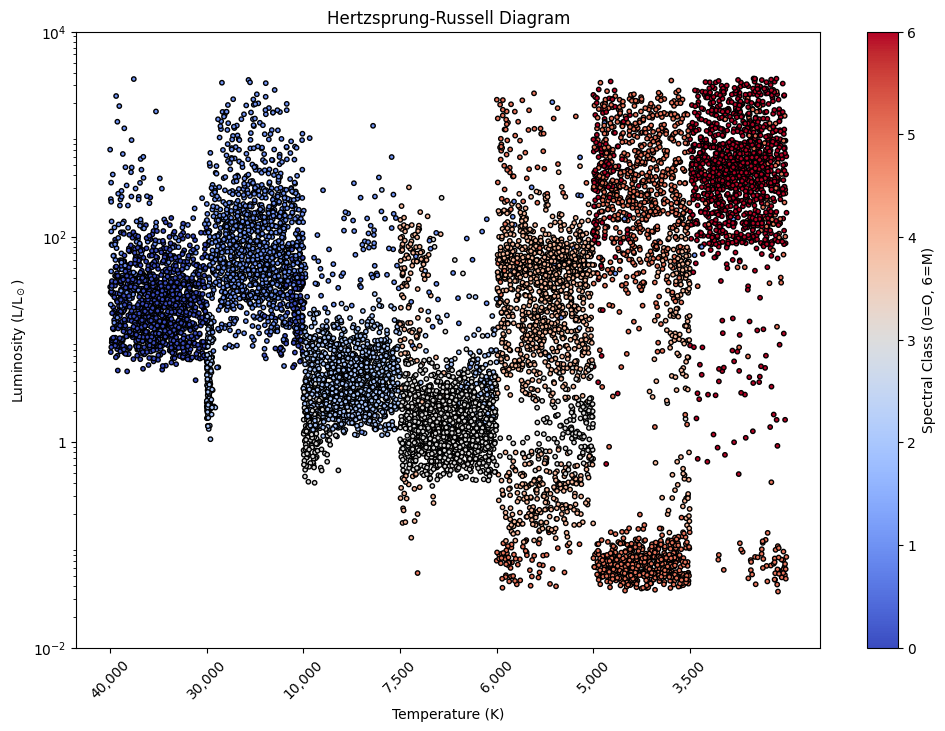

In [18]:
plot_hr_diagram(model, test_loader, original_min_lumFlame, original_max_lumFlame)

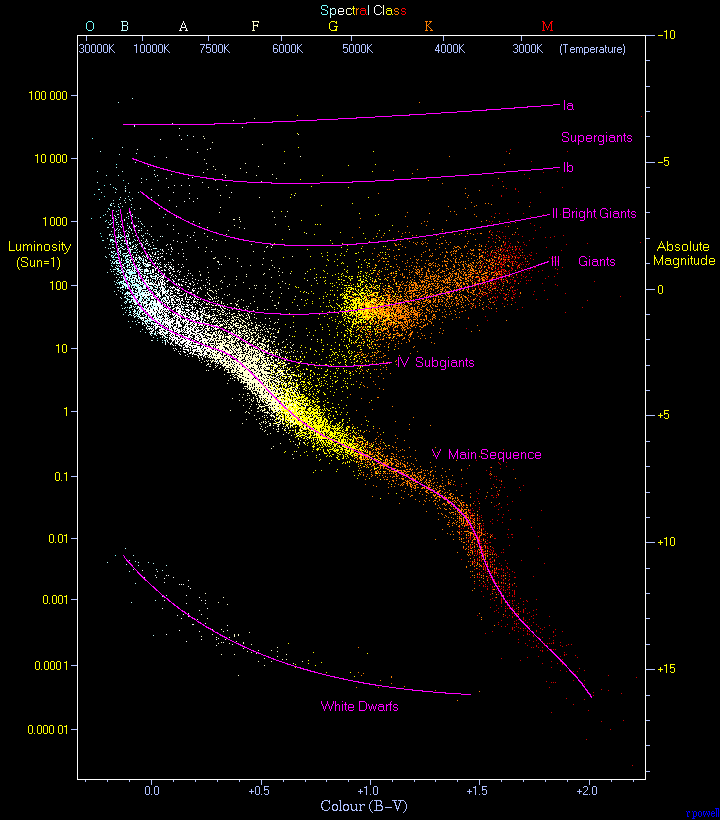